<h1> Time Series Analysis </h1>

A time series is simply a collection of observations over time. Time series data can be found over any domain and understanding a time series is quite an important factor in terms of performing different Machine Learning algorithms over it (Missing value imputation, Time series classification, Feature extraction etc).
Depending on the structure, time series can be of two types :
<ul>
  <li>Univariate Time Series</li>
  <li>Multivariate Time Series</li>
</ul>

<b> Univariate Time Series: </b> A univariate time series is a sequence of single observations o1, o2, o3, ... o n at successive points t1, t2, t3, ... t n 

<b> Multivariate Time Series: </b> A multivariate time series is a sequence of observations where each timestep has multiple observations. For timestep t1 we might have observation like o11, o12, o13, for timestep t2 we have o21, o22, o23 and so on. 

According to the interval of time, we again have two categories of Time series :
<ul>
  <li>Equi-Spaced Time Series (The time intervals between each Timestep are equi distant)</li>
  <li>Unequally-Spaced Time Series (The time intervals between each Timestep are not equal)</li>
</ul>
Time series data can show a huge variety of patterns and, for analysis, it can be useful to isolate
these patterns in separate series. Time series decomposition seeks to split the time series into single
component series each representing a certain characteristic or pattern. (the original time series can
later on be reconstructed by additions or multiplications of these components)

There are typically three components of interest:
<ul>
  <li>Trend component </li>
  <li>Seasonal component</li>
  <li>Irregular component</li>
</ul>
<b>Trend component</b> - expresses the long term progression of the time series (secular variation).
This means there is a long term increase or decrease in the mean level. The trend does not
necessarily have to be linear.

<b>Seasonal component</b> - reflects level shifts that repeat systematically within the same period
(seasonal variation). This means there is a common pattern repeating for example every month,
quarter of the year or day of the week. Seasonality is always of a fixed and known period.

<b>Irregular component</b> - describes irregular influences. These are the residuals, after the other
components have been removed from the time series. The irregular component may be, but is
not necessarily completely random. It can show autocorrelation and cycles of unpredictable
duration.

To carry out proper time series analysis, Autocorrelation is a must criteria that I am going to discuss in the next segment.

<h2> Autocorrelation </h2>

Autocorrelation, also called serial correlation, is a measure of the internal correlation within a time
series. It is a representation of the degree of similarity between the time series and a lagged version
of itself. The calculation process is similar to getting correlations between two different time series,
except that one time series is used twice, once in its original form and once in a lagged version (Lagged version means we just take 1 or couple of timesteps ahead from the original Time Series).
When the autocorrelation is computed the resulting numbers range from +1 to -1. A value of one
means that there is a perfect positive association, a value of minus one means that there is a perfect
negative association and zero means there is no association.

<h2> Dataset </h2>
I have used AReM Data Set for my analysis, the dataset can be found  <a href=""https://archive.ics.uci.edu/ml/datasets/Activity+Recognition+system+based+on+Multisensor+data+fusion+%28AReM%29>here.</a> The dataset is multivariate and equi-distant. Three different sensors were placed in central chest, left ankle and right ankle consecutively and sensor values were recorded in different gesture (lying, standing, cycling etc). Let's take a look at the picture below - 
<br>
<br>
<img src="image/sensorsPlacement-1.jpg" alt="Sensor Placement">

For each sequence, data is provided in comma separated value (csv) format. Input RSS streams are provided in files named datasetID.csv, where ID is the progressive numeric sequence ID for each repetition of the activity performed. 
In each file, each row corresponds to a time step measurement (in temporal order) and contains the following information: 
<b>avg_rss12, var_rss12, avg_rss13, var_rss13, avg_rss23, var_rss23 
where avg and var are the mean and variance values over 250 ms of data, respectively. So we have four sensor instances per second.</b>

<h2> Autocorrelation Analysis</h2>
We have six possible gesture in our dataset, namely -
<ul>
  <li>Bending (Two types)</li>
  <li>Cycling</li>
  <li>Lying</li>
  <li>Sitting</li>
  <li>Standing</li>
  <li>Walking</li>  
</ul>
We can start with walking gesture first, let's define two python functions -

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
#timesteps are the different interval or lagging we wanna try with
def autoCorrelation(timeseries, timesteps):
    auto_corr = []
    time_gap = []
    
    for shift in timesteps:
        
        time_i_values = np.array(timeseries[shift:]) #Shift first n = lagging number of timesteps
        
        time_i_minus = np.array(timeseries[:-shift]) #Shift last n= lagging number of timesteps
        
        auto_corr.append(np.corrcoef(time_i_minus, time_i_values)[0,1])
        
        time_gap.append(shift)
    
    return auto_corr

In [38]:
#We have multiple dataset under each gesture category. For each category, we want to concat all the dataset so
#that we see everything in a bigger picture
def dataProcessing(path, sensor_index):
    
    #sensor_index -> We want to deal with one sensor attribute at a time
    
    files = os.listdir(path)
    
    dataset_list = []
    
    #It's important to get the files consecutively as each of them represents time series
    
    for i in range(len(files)):
        dataset = pd.read_csv(path+"/dataset"+str(i+1)+".csv")
    
        dataset_list.append(dataset)
    
    dataset = pd.concat(dataset_list)
    
    sensor_data = dataset.iloc[:,sensor_index]
    
    return sensor_data

In [73]:
path = 'dataset/lying'

lying_avg_rss12 = dataProcessing(path, 1)

In [74]:
lying_avg_rss12.head()

0    29.0
1    29.0
2    29.0
3    28.5
4    29.0
Name: avg_rss12, dtype: float64

In [75]:
# 4,8,12 consecutively represent 1,2,3 second. So simply we wanna generate our lagging version of data with 1,2,3 
#second's interval and so on
timesteps = [4,8,12,16,20,24,28,32,36,40]
lying_auto_corr_rss12 = autoCorrelation(lying_avg_rss12, timesteps)

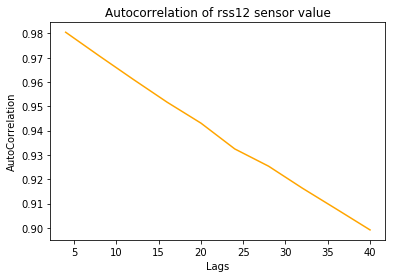

In [76]:
#Visualization
plt.plot(timesteps, lying_auto_corr_rss12, color='orange', label='Walking')
plt.xlabel('Lags')
plt.ylabel('AutoCorrelation')
plt.title('Autocorrelation of rss12 sensor value')
plt.show()

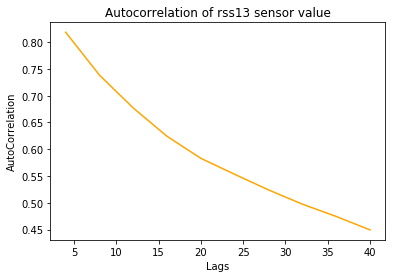

In [77]:
lying_avg_rss13 = dataProcessing(path, 3)
lying_auto_corr_rss13 = autoCorrelation(lying_avg_rss13, timesteps)
#Visualization
plt.plot(timesteps, lying_auto_corr_rss13, color='orange', label='Walking')
plt.xlabel('Lags')
plt.ylabel('AutoCorrelation')
plt.title('Autocorrelation of rss13 sensor value')
plt.show()

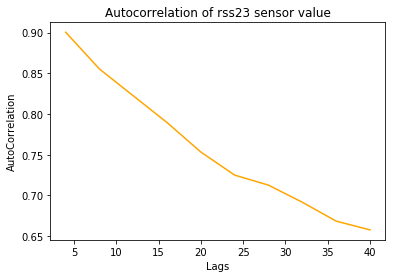

In [79]:
lying_avg_rss23 = dataProcessing(path, 5)
lying_auto_corr_rss23 = autoCorrelation(lying_avg_rss23, timesteps)
#Visualization
plt.plot(timesteps, lying_auto_corr_rss23, color='orange', label='Walking')
plt.xlabel('Lags')
plt.ylabel('AutoCorrelation')
plt.title('Autocorrelation of rss23 sensor value')
plt.show()

<br>
All these three sensor values (avg is taken, variance is not taken for now) have positive association within them, whereas for lag value 4 we got best Autocorrelation value. This can be a very important information for models like Recurrent Neural Networks (How many timesteps should be considered to predict the next timestep and structure LSTM layers accordingly). 
Let's carry our further analysis with Sitting gesture -

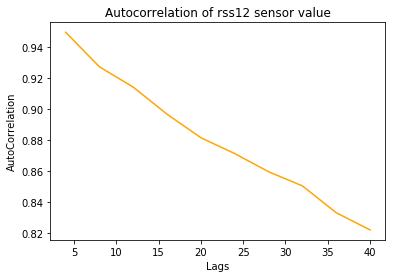

In [70]:
#sitting - avg_rss12
path = 'dataset/sitting'

sitting_avg_rss12 = dataProcessing(path, 1)
sitting_auto_corr_rss12 = autoCorrelation(sitting_avg_rss12, timesteps)
#Visualization
plt.plot(timesteps, sitting_auto_corr_rss12, color='orange', label='Sitting')
plt.xlabel('Lags')
plt.ylabel('AutoCorrelation')
plt.title('Autocorrelation of rss12 sensor value')
plt.show()

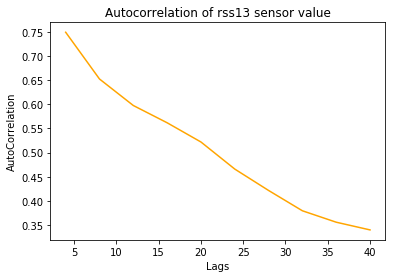

In [71]:
#sitting - avg_rss13
sitting_avg_rss13 = dataProcessing(path, 3)
sitting_auto_corr_rss13 = autoCorrelation(sitting_avg_rss13, timesteps)
#Visualization
plt.plot(timesteps, sitting_auto_corr_rss13, color='orange', label='Sitting')
plt.xlabel('Lags')
plt.ylabel('AutoCorrelation')
plt.title('Autocorrelation of rss13 sensor value')
plt.show()


The next analysis will be performed into two parts - 
<ul>
  <li>Inter correlation analysis</li>
  <li>Intra autocorrelation analysis</li> 
</ul>



<h2>Inter Correlation Analysis</h2>

This section intends to find out correlation matrix within a particular gesture. This can be helpful in lots of ways, e.g. while we are performing regression to impute missing values, highly correlated attributes can be figured out easily and quality imputation can be ensured. 

In [114]:
#Performing Inter correlation analysis
path_lying = 'dataset/lying'
path_walking = 'dataset/walking'
path_standing = 'dataset/standing'
#We should take all sensor values now
walking_dataset = dataProcessing(path_walking, [1,2,3,4,5,6])
lying_dataset = dataProcessing(path_lying, [1,2,3,4,5,6])
standing_dataset = dataProcessing(path_standing, [1,2,3,4,5,6])

standing_dataset.corr()

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
avg_rss12,1.000000,-0.313842,0.115938,-0.140245,0.047379,-0.114059
var_rss12,-0.313842,1.000000,-0.027959,0.156752,-0.031147,0.159559
avg_rss13,0.115938,-0.027959,1.000000,-0.339173,-0.105288,-0.031265
var_rss13,-0.140245,0.156752,-0.339173,1.000000,-0.001621,0.290965
avg_rss23,0.047379,-0.031147,-0.105288,-0.001621,1.000000,-0.271068
var_rss23,-0.114059,0.159559,-0.031265,0.290965,-0.271068,1.000000


In [62]:
walking_dataset.corr()

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
avg_rss12,1.000000,-0.134575,0.017842,-0.008943,-0.112200,0.010846
var_rss12,-0.134575,1.000000,-0.074460,-0.022735,0.008725,0.059138
avg_rss13,0.017842,-0.074460,1.000000,-0.274245,0.026082,-0.010650
var_rss13,-0.008943,-0.022735,-0.274245,1.000000,-0.021263,0.011747
avg_rss23,-0.112200,0.008725,0.026082,-0.021263,1.000000,-0.301450
var_rss23,0.010846,0.059138,-0.010650,0.011747,-0.301450,1.000000



<h2>Intra AutoCorrelation Analysis</h2>

We can logically expect autocorrelation graph for some sensor values between gestures like walking and cycling, sitting and lying, bending (category 2) and sitting should have same pattern. Note that, our dataset has two categories of bending gestures, something like this - 
<br>
<br>
<img src="image/bendingType-1.jpg" alt="Sensor Placement">
<br>
<br>
We can start our analysis to prove that, cycling and walking has the same pattern for rss_12 sensor value. We expect this sensor attribute to have somewhat similar shape for autocorrelation.

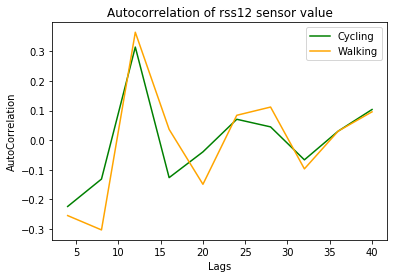

In [109]:
path_walking = "dataset/walking"
path_cycling = 'dataset/cycling'

#Selecting avg_rss_23
walking_var_rss12 = dataProcessing(path_walking, 1)
cycling_var_rss12 = dataProcessing(path_cycling, 1)


timesteps = [4,8,12,16,20,24,28,32,36,40]

cycling_auto_corr = autoCorrelation(walking_var_rss12, timesteps)
walking_auto_corr = autoCorrelation(cycling_var_rss12, timesteps)

plt.plot(timesteps, cycling_auto_corr, color='g', label='Cycling')
plt.plot(timesteps, walking_auto_corr, color='orange', label='Walking')
plt.xlabel('Lags')
plt.ylabel('AutoCorrelation')
plt.title('Autocorrelation of rss12 sensor value')
plt.legend()
plt.show()

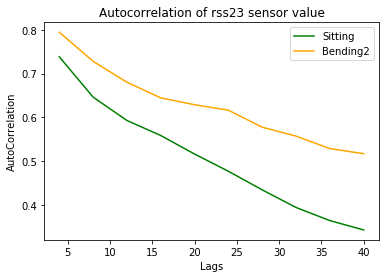

In [107]:
#Walking and Bending (Category 2) should have some relations
path_sitting = "dataset/sitting"
path_bending = 'dataset/bending2'

#Selecting avg_rss_23
sitting_var_rss23 = dataProcessing(path_sitting, 5)
bending_var_rss23 = dataProcessing(path_bending, 5)


timesteps = [4,8,12,16,20,24,28,32,36,40]

sitting_auto_corr = autoCorrelation(sitting_var_rss23, timesteps)
bending_auto_corr = autoCorrelation(bending_var_rss23, timesteps)

plt.plot(timesteps, sitting_auto_corr, color='g', label='Sitting')
plt.plot(timesteps, bending_auto_corr, color='orange', label='Bending2')
plt.xlabel('Lags')
plt.ylabel('AutoCorrelation')
plt.title('Autocorrelation of rss23 sensor value')
plt.legend()
plt.show()

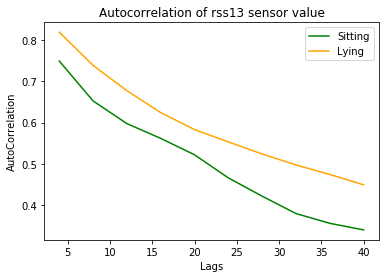

In [110]:
#Sitting and Lying should have some relations
path_sitting = "dataset/sitting"
path_lying = 'dataset/lying'

#Selecting avg_rss_23
sitting_var_rss23 = dataProcessing(path_sitting, 3)
lying_var_rss23 = dataProcessing(path_lying, 3)


timesteps = [4,8,12,16,20,24,28,32,36,40]

sitting_auto_corr = autoCorrelation(sitting_var_rss23, timesteps)
lying_auto_corr = autoCorrelation(lying_var_rss23, timesteps)

plt.plot(timesteps, sitting_auto_corr, color='g', label='Sitting')
plt.plot(timesteps, lying_auto_corr, color='orange', label='Lying')
plt.xlabel('Lags')
plt.ylabel('AutoCorrelation')
plt.title('Autocorrelation of rss13 sensor value')
plt.legend()
plt.show()

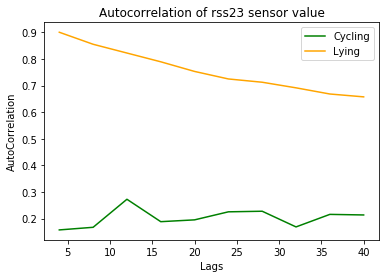

In [113]:
#Lying and Cycling should completely have different shapes
#Sitting and Lying should have some relations
path_cycling = "dataset/cycling"
path_lying = 'dataset/lying'

#Selecting avg_rss_23
cycling_var_rss23 = dataProcessing(path_cycling, 5)
lying_var_rss23 = dataProcessing(path_lying, 5)


timesteps = [4,8,12,16,20,24,28,32,36,40]

cycling_auto_corr = autoCorrelation(cycling_var_rss23, timesteps)
lying_auto_corr = autoCorrelation(lying_var_rss23, timesteps)

plt.plot(timesteps, cycling_auto_corr, color='g', label='Cycling')
plt.plot(timesteps, lying_auto_corr, color='orange', label='Lying')
plt.xlabel('Lags')
plt.ylabel('AutoCorrelation')
plt.title('Autocorrelation of rss23 sensor value')
plt.legend()
plt.show()


These analysis will help us to figure out if we have some missing data in a particular gesture, how other gestures and their corresponding sensor values can contribute in terms of imputation.<b> Please note that, different component analysis (Seasonal, Trend etc) was not carried out as this domain is less likely to have trend or seasonality. Still if needed, I can present it in my next writings.</b>

<h2> Background Study </h2>
<ul>
  <li><a href= "https://www.researchgate.net/publication/310796615_Full_Length_Research_Paper_Time_Series_Analysis_of_Monthly_Rainfall_data_for_the_Gadaref_rainfall_station_Sudan_by_Sarima_Methods">Full Length Research Paper Time Series Analysis of Monthly Rainfall data for the Gadaref rainfall station, Sudan, by Sarima Methods</a></li>
   
</ul>
